In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cv2
import glob
from google.colab.patches import cv2_imshow
from sklearn.model_selection import KFold
import copy
from joblib import dump,load
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
dir = glob.glob("/content/drive/MyDrive/newPP/*")

x = []
y = []

for i in range(3):
  for d in glob.glob(dir[i]+"/*"):
    x.append(d)

    if d.split("/")[-2] == "Normal":
      y.append(0)
    elif d.split("/")[-2] == "Papilledema":
      y.append(1)
    else:
      y.append(2)


In [ ]:
timg = cv2.imread("/content/drive/MyDrive/PP/PP2/Papilledema/160.jpg",0)
cv2_imshow(timg)

thimg = np.zeros_like(timg)
thimg[timg >=128] = 255
thimg[timg < 128] = 0

cv2_imshow(thimg)

In [ ]:
ix = []
ri = 200
for m in x:
  img = cv2.imread(m)
  img = cv2.resize(img,[ri,ri])
  vec = img.flatten()
  ix.append(vec)
ix = np.array(ix)

In [ ]:
xtrain, xtest,ytrain,ytest = train_test_split(ix,y,test_size=0.25,random_state = 42)

In [ ]:
ay = np.array(y)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

arrmax=[]
arrpos=[]
arrmaxmodel=[]
xtrain, xtest =[],[]
ytrain, ytest =[],[]
for train_index, test_index in kf.split(ix):
  xtrain.append(ix[train_index])
  xtest.append(ix[test_index])
  ytrain.append(ay[train_index])
  ytest.append(ay[test_index])
  print(ytest[-1])
  max = -1
  pos = -1
  maxmodel = None
  for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain[-1], ytrain[-1])
    ypred = knn.predict(xtest[-1])
    accuracy = accuracy_score(ytest[-1], ypred)
    print("Accuracy of ",k,":", accuracy)
    if accuracy > max:
      max = accuracy
      pos = k
      maxmodel = copy.deepcopy(knn)
  arrmax.append(max)
  arrpos.append(pos)
  arrmaxmodel.append(maxmodel)



In [ ]:

for i in range(len(arrmaxmodel)):
  dump(arrmaxmodel[i], "/content/drive/MyDrive/ProjectModelsML/KNN/"+str(arrpos[i])+"nn"+str(i)+".joblib")

Accuracy in 5nn fold-0: 0.7883211678832117
[[145   2   8]
 [ 22  37   6]
 [ 18   2  34]]


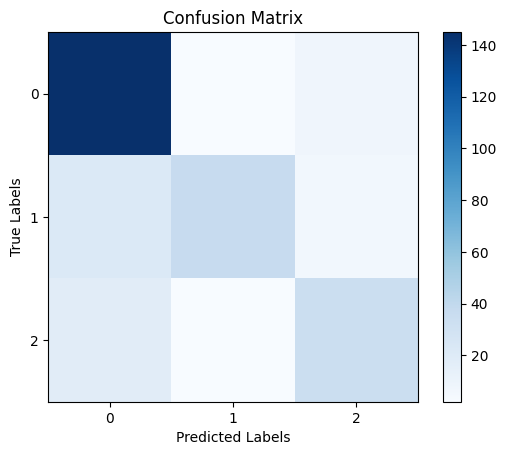

Accuracy in 7nn fold-1: 0.7956204379562044
[[154   0   3]
 [ 22  32  13]
 [ 16   2  32]]


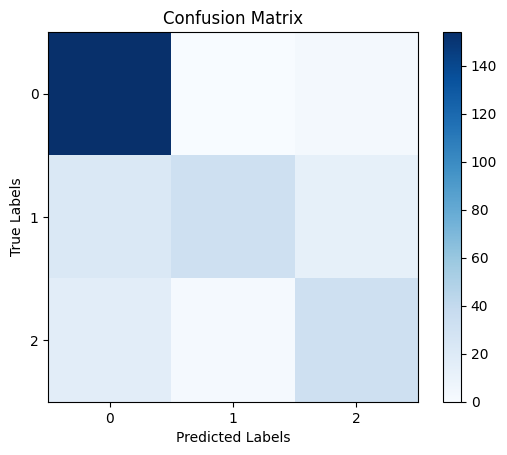

Accuracy in 5nn fold-2: 0.7554744525547445
[[131   4   5]
 [ 23  30   4]
 [ 26   5  46]]


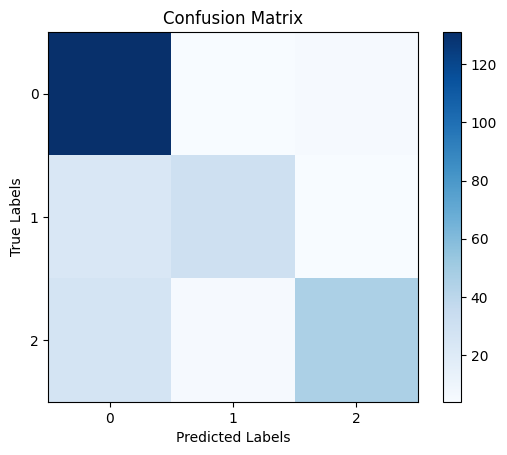

Accuracy in 5nn fold-3: 0.791970802919708
[[156   4   2]
 [ 22  26   8]
 [ 18   3  35]]


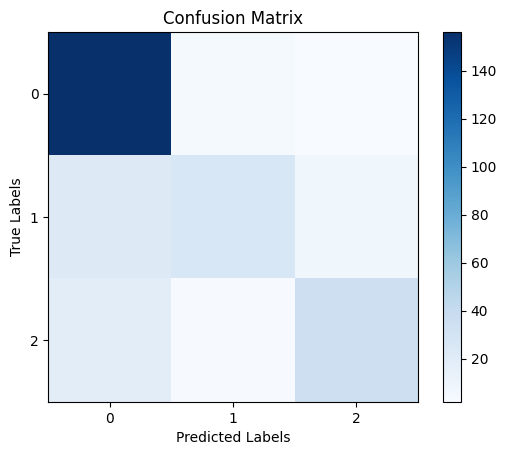

Accuracy in 7nn fold-4: 0.7948717948717948
[[158   2   5]
 [ 21  25   4]
 [ 23   1  34]]


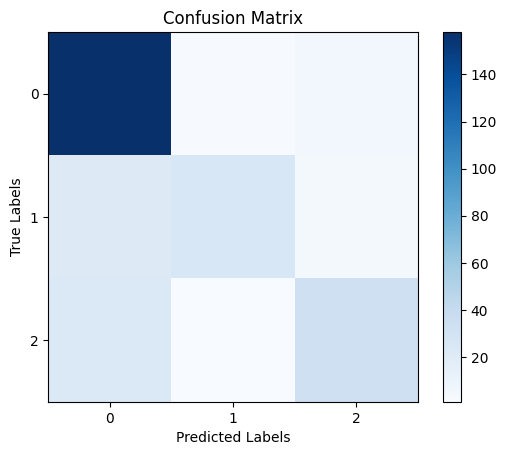

In [ ]:
kd = glob.glob("/content/drive/MyDrive/ProjectModelsML/KNN/*")
for m in kd:
  loaded_model = load(m)
  p = int(m.split("/")[-1].split(".")[0][-1])
  nk = int(m.split("/")[-1].split(".")[0][0])
  ypred = loaded_model.predict(xtest[p])
  accuracy = accuracy_score(ytest[p], ypred)
  print("Accuracy in "+str(nk)+"nn fold-"+str(p)+":", accuracy)
  cm = confusion_matrix(ytest[p],ypred)
  print(cm)
  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.xticks(np.arange(3))
  plt.yticks(np.arange(3))
  plt.show()